Mounted at /content/drive


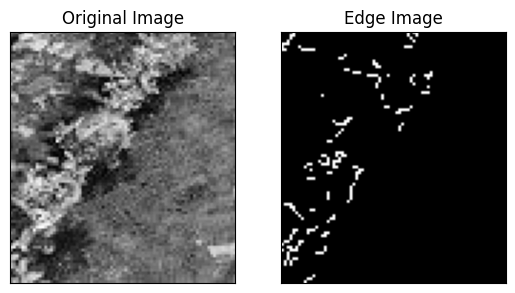

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
one_c= cv.imread('/content/drive/MyDrive/Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)
assert one_c is not None, "file could not br read, check withos.path.exists()"
edges = cv.Canny(one_c,550,690)
indices = np.where(edges != [0] )
x = indices[1]
y = indices[0]

plt.subplot(121),plt.imshow(one_c,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


plt.show()

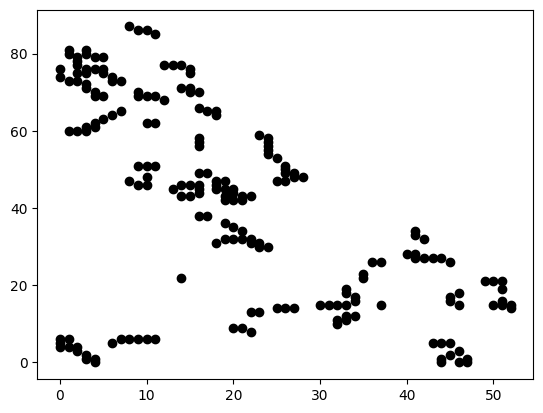

In [ ]:
plt.scatter(x,y,c = "black")
plt.show()

Slope angle: -44.38702510610569


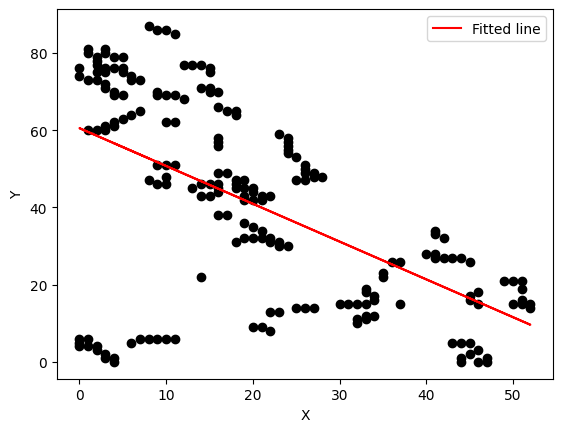

In [ ]:
plt.scatter(x,y,c = "black")
n = len(x)
X = np.vstack([x, np.ones(n)]).T
m, c = np.linalg.lstsq(X, y, rcond = None)[0]

plt.plot(x, m*x + c, 'r', label='Fitted line')


plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

slope_angle = np.arctan(m) * 180 / np.pi
print("Slope angle:", slope_angle)

plt.show()

Slope angle: -67.97343481367827


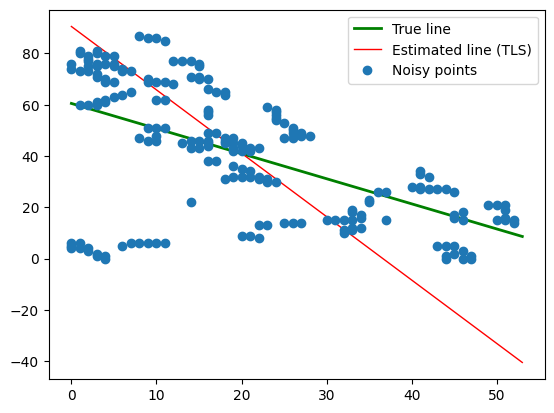

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.stats import linregress
np.random.seed(45)
noise = np.random.randn(len(x))
m, c, _, _, _ = linregress(x, y)

n = len(x)

u11 = np.sum((x - np.mean(x))**2)
u12 = np.sum((x - np.mean(x))*(y - np.mean(y)))
u21 = u12
u22 = np.sum((y - np.mean(y))**2)
U = np.array([[u11, u12], [u21, u22]])
w, v = np.linalg.eig(U)
smallest_eigenvector = v[:, np.argmin(w)]
a = smallest_eigenvector[0]
b = smallest_eigenvector[1]
d = a*np.mean(x) + b*np.mean(y)
mstar = -a/b
cstar = d/b

x_extended = np.linspace(0, max(x) + 1, 100)


plt.plot(x_extended, m*x_extended + c, color='g', linestyle='-', linewidth=2, label=r'True line')
plt.plot(x_extended, mstar*x_extended + cstar, color='r', linestyle='-', linewidth=1, label=r'Estimated line (TLS)')
plt.plot(x,y, 'o', label='Noisy points')
plt.legend(loc='best')

slope_angle = np.arctan(mstar) * 180 / np.pi
print("Slope angle:", slope_angle)


plt.show()





Number of inliers: 170
Number of outliers: 29


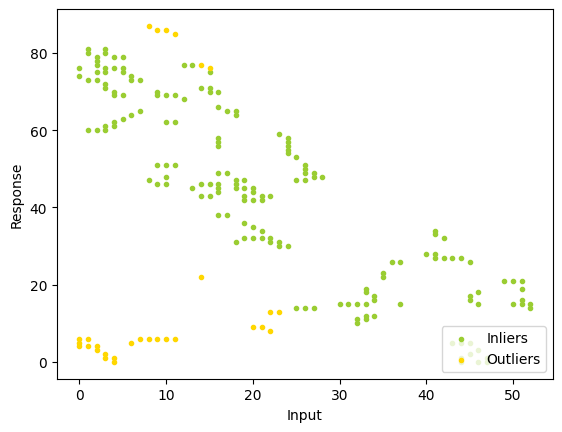

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import RANSACRegressor

x = indices[1]
y = indices[0]


ransac = RANSACRegressor()
ransac.fit(x.reshape(-1, 1), y)


inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask


n_inliers = np.sum(inlier_mask)
n_outliers = np.sum(outlier_mask)

print("Number of inliers:", n_inliers)
print("Number of outliers:", n_outliers)


plt.scatter(x[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers")
plt.scatter(x[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers")
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

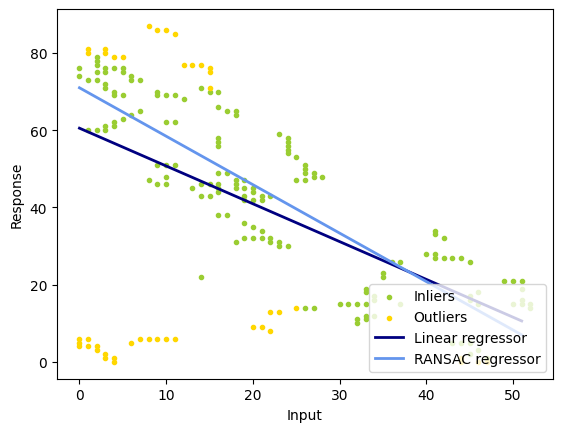

In [ ]:
from sklearn import linear_model, datasets
lr = linear_model.LinearRegression()
lr.fit(x.reshape(-1, 1), y)


ransac = linear_model.RANSACRegressor()
ransac.fit(x.reshape(-1, 1), y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_x = np.arange(x.min(), x.max())[:, np.newaxis]
line_y = lr.predict(line_x)
line_y_ransac = ransac.predict(line_x)

lw = 2
plt.scatter(
    x[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    x[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_x, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.plot(
    line_x,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()



Slope angle (RANSAC Regression): -54.30889331130812


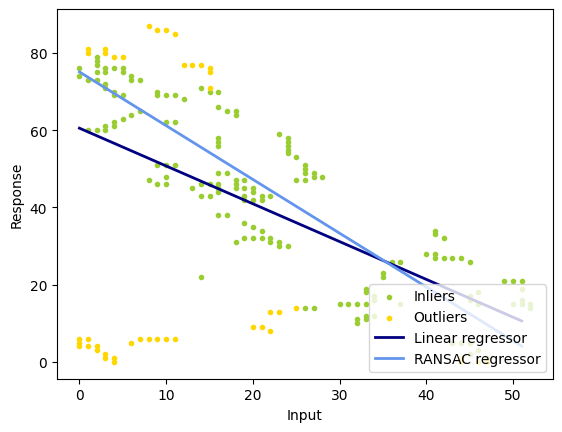

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(x.reshape(-1, 1), y)

ransac = linear_model.RANSACRegressor()
ransac.fit(x.reshape(-1, 1), y)



slope_ransac = ransac.estimator_.coef_[0]
slope_angle_ransac = np.arctan(slope_ransac) * 180 / np.pi
print("Slope angle (RANSAC Regression):", slope_angle_ransac)

plt.scatter(x[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers")
plt.scatter(x[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers")
plt.plot(line_x, lr.predict(line_x), color="navy", linewidth=2, label="Linear regressor")
plt.plot(line_x, ransac.predict(line_x), color="cornflowerblue", linewidth=2, label="RANSAC regressor")
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()